# Simulation of spring system 

My intuition tell me the spring system will have little resistance at the start and will increase as we compress it, then it will reach a peak value at some angle and then it will decrease. 

INSERT FIGURES HERE

potential energy in J 0.13564488999999996
velocity in m/s 0.45163843746462573
min angle:  29.72972972972973
max angle:  90.0
piston length compressed:  2.7554552980815448e-18
piston length extended:  0.03907684408924317
piston stroke length:  0.03907684408924317
Max force in grams:  341.83383394654226
Min force:  0


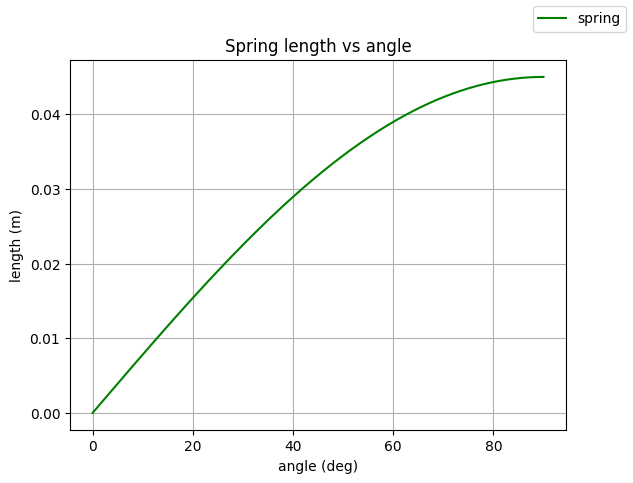

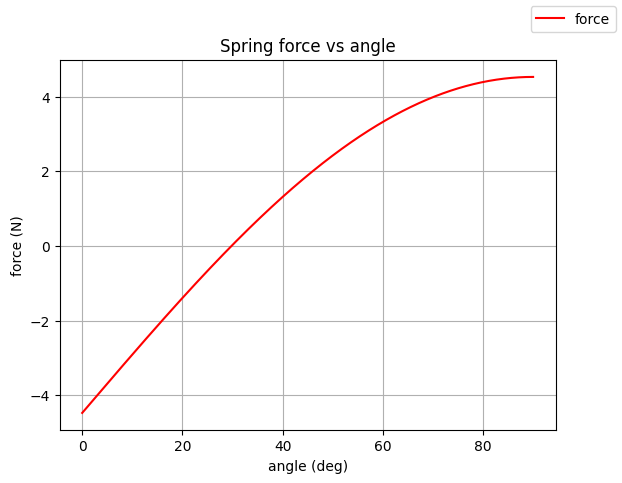

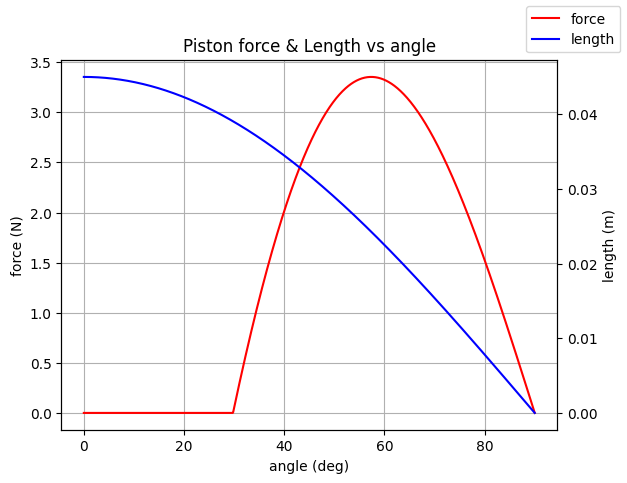

In [5]:
import numpy as np
import matplotlib.pyplot as plt

spring_constant = 0.05  *1000 *4# N/m 
spring_length_at_rest = 22.35 /1000# m
spring_max_length = 59.18 /1000# m

potential_energy = (0.5 * spring_constant * (spring_max_length - spring_length_at_rest)**2)# J

print ("potential energy in J", potential_energy)
mass = 1.33 # kg 

kinetic_energy = potential_energy
velocity = np.sqrt(2*kinetic_energy/mass)
print ("velocity in m/s", velocity)


arm_length = 22.5/1000 # mm 

force_table = []
length_table = []
piston_length_table = []
piston_force_table = []

min_angle = 0
max_angle = np.pi/2

steps = 1000 
angles = np.linspace(0, np.pi/2, steps)


for i in range(steps):
    length_of_spring = 2*arm_length*np.sin(angles[i])
    length_table.append(length_of_spring)

    piston_length = 2*arm_length*np.cos(angles[i])
    piston_length_table.append(piston_length)


    force = - spring_constant*(spring_length_at_rest - length_of_spring)
    force_table.append(force)

    force_piston = 2*force*np.cos(angles[i])
    
    if length_of_spring > spring_max_length:
        force_piston = 0
        max_angle = min(angles[i], max_angle)

    if length_of_spring < spring_length_at_rest:
        force_piston = 0
        min_angle = max(angles[i], min_angle)


    piston_force_table.append(force_piston)

print ("min angle: ", min_angle*180/np.pi)
print ("max angle: ", max_angle*180/np.pi)

piston_length_at_max = 2*arm_length*np.cos(max_angle)
piston_length_at_min = 2*arm_length*np.cos(min_angle)

print ("piston length compressed: ", piston_length_at_max)
print ("piston length extended: ", piston_length_at_min)

piston_stroke_length = piston_length_at_max - piston_length_at_min
print ("piston stroke length: ", -piston_stroke_length)
print ("Max force in grams: ", max(piston_force_table)*1000/9.81)
print ("Min force: ", min(piston_force_table))



fig, ax = plt.subplots()
ax.plot(angles*180/np.pi, length_table, 'g', label='spring')
ax.set(xlabel='angle (deg)', ylabel='length (m)',
       title='Spring length vs angle')

fig.legend()
ax.grid()
plt.show()

fig, ax = plt.subplots()
ax.plot(angles*180/np.pi, force_table, 'r', label='force')
ax.set(xlabel='angle (deg)', ylabel='force (N)',
       title='Spring force vs angle')
fig.legend()
ax.grid()
plt.show()

fig, ax = plt.subplots()
ax.plot(angles*180/np.pi, piston_force_table, 'r', label='force')
ax2 = ax.twinx()
ax2.plot(angles*180/np.pi, piston_length_table, 'b', label='length')
ax2.set(ylabel='length (m)')
ax.set(xlabel='angle (deg)', ylabel='force (N)',
       title='Piston force & Length vs angle')

fig.legend()
ax.grid()
plt.show()




